In [ ]:
# Gallery using chained method interface

In [2]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import dsp
from schemdraw import flow
from schemdraw.util import Point

from schemdraw.parsing import logicparse
#schemdraw.use('svg')
#schemdraw.theme('gruvboxl')

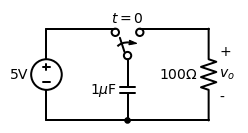

In [3]:
d = schemdraw.Drawing()
d += (V1 := elm.SourceV().label('5V'))
d += elm.Line().right().length(d.unit*.75)
d += (S1 := elm.SwitchSpdt2(action='close').up().anchor('b').label('$t=0$', loc='rgt'))
d += elm.Line().right().at(S1.c).length(d.unit*.75)
d += elm.Resistor().down().label('$100\Omega$').label(['+','$v_o$','-'], loc='bot')
d += elm.Line().to(V1.start)
d += elm.Capacitor().down().at(S1.a).toy(V1.start).label('1$\mu$F')
d += elm.Dot()
d.draw()


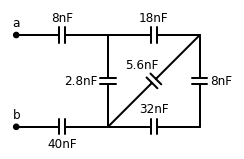

In [4]:
d = schemdraw.Drawing(fontsize=12)
d += (A := elm.Dot().label('a'))
d += (C1 := elm.Capacitor().label('8nF'))
d += (C2 := elm.Capacitor().label('18nF'))
d += (C3 := elm.Capacitor().down().label('8nF', loc='bottom'))
d += (C4 := elm.Capacitor().left().label('32nF'))
d += (C5 := elm.Capacitor().label('40nF', loc='bottom'))
d += (B := elm.Dot().label('b'))
d += (C6 := elm.Capacitor().endpoints(C1.end, C5.start).label('2.8nF'))
d += (C7 := elm.Capacitor().endpoints(C2.end, C5.start)
      .label('5.6nF', loc='center', ofst=(-.3, -.1), halign='right', valign='bottom'))
d.draw()

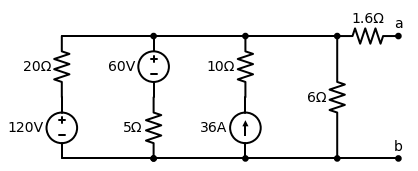

In [5]:
d = schemdraw.Drawing(unit=2)  # unit=2 makes elements have shorter than normal leads
d.push()
d += (R1 := elm.Resistor().down().label('20Ω'))
d += (V1 := elm.SourceV().down().reverse().label('120V'))
d += elm.Line().right().length(3)
d += elm.Dot()
d.pop()
d += elm.Line().right().length(3)
d += elm.Dot()
d += elm.SourceV().down().reverse().label('60V')
d += elm.Resistor().label('5Ω')
d += elm.Dot()
d += elm.LineDot().right().length(3)
d += elm.SourceI().up().label('36A')
d += elm.Resistor().label('10Ω')
d += elm.Dot()
d += elm.Line().left().length(3).hold()
d += elm.Line().right().length(3)
d += elm.Dot()
d += (R6 := elm.Resistor().down().toy(V1.end).label('6Ω'))
d += elm.Dot()
d += elm.Line().left().length(3).hold()
d += elm.Resistor().right().at(R6.start).label('1.6Ω')
d += elm.Dot().label('a')
d += elm.Line().right().at(R6.end)
d += elm.Dot().label('b')
d.draw()


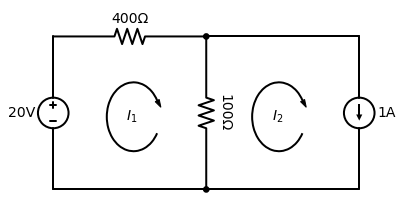

In [6]:
d = schemdraw.Drawing(unit=5)
d += (V1 := elm.SourceV().label('20V'))
d += (R1 := elm.Resistor().right().label('400Ω'))
d += elm.Dot()
d.push()
d += (R2 := elm.Resistor().down().label('100Ω', loc='bot', rotate=True))
d += elm.Dot()
d.pop()
d += (L1 := elm.Line())
d += (I1 := elm.SourceI().down().label('1A', loc='bot'))
d += (L2 := elm.Line().left().tox(V1.start))
d.loopI([R1,R2,L2,V1], '$I_1$', pad=1.25)
d.loopI([R1,I1,L2,R2], '$I_2$', pad=1.25)  # Use R1 as top element for both so they get the same height
d.draw()

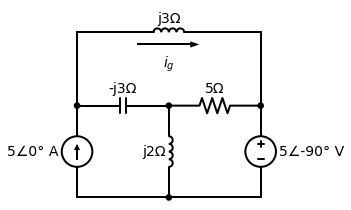

In [7]:
d = schemdraw.Drawing()
d += (I1 := elm.SourceI().label('5∠0° A'))
d += elm.Dot()
d.push()
d += elm.Capacitor().right().label('-j3Ω')
d += elm.Dot()
d.push()
d += elm.Inductor().down().label('j2Ω')
d += elm.Dot()
d.pop()
d += elm.Resistor().right().label('5Ω')
d += elm.Dot()
d += (V1 := elm.SourceV().down().reverse().label('5∠-90° V', loc='bot'))
d += elm.Line().left().tox(I1.start)
d.pop()
d += elm.Line().up().length(d.unit*.8)
d += (L1 := elm.Inductor().right().tox(V1.start).label('j3Ω'))
d += elm.Line().down().length(d.unit*.8)
d.labelI(L1, '$i_g$', top=False)
d.draw()

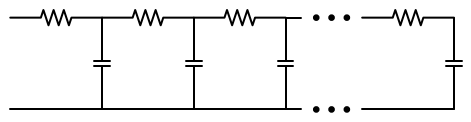

In [8]:
d1 = schemdraw.Drawing()
d1 += elm.Resistor()
d1.push()
d1 += elm.Capacitor().down()
d1 += elm.Line().left()
d1.pop()

d2 = schemdraw.Drawing()
for i in range(3):
    d2 += elm.ElementDrawing(d1)

d2.push()
d2 += elm.Line().length(d2.unit/6)
d2 += elm.DotDotDot()
d2 += elm.ElementDrawing(d1)
d2.pop()
d2.here = (d2.here[0], d2.here[1]-d2.unit)
d2 += elm.Line().right().length(d2.unit/6)
d2 += elm.DotDotDot()
d2.draw()


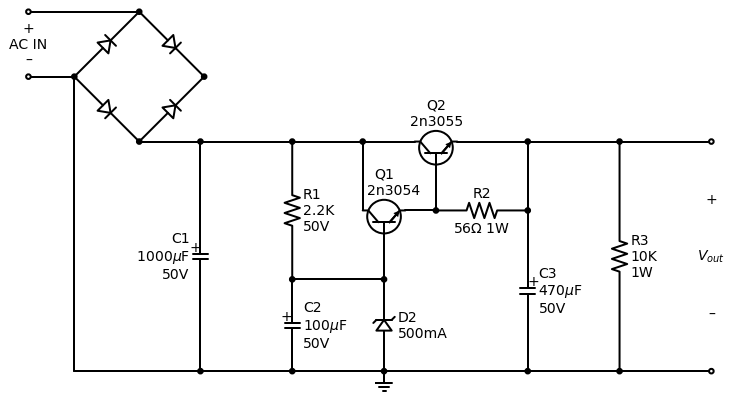

In [9]:
d = schemdraw.Drawing(inches_per_unit=.5, unit=3)
d += (D1 := elm.Diode().theta(-45))
d += elm.Dot()
d += (D2 := elm.Diode().theta(225).reverse())
d += elm.Dot()
d += (D3 := elm.Diode().theta(135).reverse())
d += elm.Dot()
d += (D4 := elm.Diode().theta(45))
d += elm.Dot()

d += elm.Line().left().at(D3.end).length(d.unit/2)
d += elm.Dot(open=True)
d += (G := elm.Gap().up().toy(D1.start).label(['–', 'AC IN', '+']))
d += elm.Line().left().at(D4.end).tox(G.start)
d += elm.Dot(open=True)

d += (top := elm.Line().right().at(D2.end).length(d.unit*3))
d += (Q2 := elm.BjtNpn(circle=True).up().anchor('collector').label('Q2\n2n3055'))
d += elm.Line().down().at(Q2.base).length(d.unit/2)
d += (Q2b := elm.Dot())
d += elm.Line().left().length(d.unit/3)
d += (Q1 := elm.BjtNpn(circle=True).up().anchor('emitter').label('Q1\n    2n3054'))
d += elm.Line().up().at(Q1.collector).toy(top.center)
d += elm.Dot()

d += elm.Line().down().at(Q1.base).length(d.unit/2)
d += elm.Dot()
d += elm.Zener().down().reverse().label('D2\n500mA', loc='bot')
d += elm.Dot()
d += (G := elm.Ground())
d += elm.Line().left()
d += elm.Dot()
d += elm.Capacitor(polar=True).up().reverse().label('C2\n100$\mu$F\n50V', loc='bot')
d += elm.Dot()
d.push()
d += elm.Line().right()
d.pop()
d += elm.Resistor().up().toy(top.end).label('R1\n2.2K\n50V', loc='bot')
d += elm.Dot()

d.move(dx=-d.unit, dy=0)
d += elm.Dot()
d += elm.Capacitor(polar=True).down().toy(G.start).flip().label('C1\n 1000$\mu$F\n50V')
d += elm.Dot()
d += elm.Line().left().at(G.start).tox(D4.start)
d += elm.Line().up().toy(D4.start)

d += elm.Resistor().right().at(Q2b.center).label('R2').label('56$\Omega$ 1W', loc='bot')
d += elm.Dot()
d.push()
d += elm.Line().up().toy(top.start)
d += elm.Dot()
d += elm.Line().left().tox(Q2.emitter)
d.pop()
d += elm.Capacitor(polar=True).down().toy(G.start).label('C3\n470$\mu$F\n50V', loc='bot')
d += elm.Dot()
d += elm.Line().left().tox(G.start).hold()
d += elm.Line().right()
d += elm.Dot()
d += elm.Resistor().up().toy(top.center).label('R3\n10K\n1W', loc='bot')
d += elm.Dot()
d += elm.Line().left().hold()
d += elm.Line().right()
d += elm.Dot(open=True)
d += elm.Gap().down().toy(G.start).label(['+', '$V_{out}$', '–'])
d += elm.Dot(open=True)
d += elm.Line().left()
d.draw()


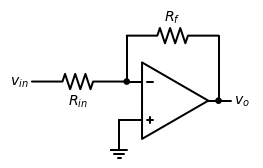

In [10]:
d = schemdraw.Drawing()
d += (op := elm.Opamp())
d += elm.Line().left().at(op.in2).length(d.unit/4)
d += elm.Line().down().length(d.unit/5)
d += elm.Ground()
d += elm.Line().left().at(op.in1).length(d.unit/6)
d += elm.Dot()
d.push()
d += (Rin := elm.Resistor().left().at(Point(op.in1)-Point((d.unit/5,0)))
                          .label('$R_{in}$', loc='bot')
                          .label('$v_{in}$', loc='lft'))
d.pop()
d += elm.Line().up().length(d.unit/2)
d += elm.Resistor().right().label('$R_f$')
d += elm.Line().down().toy(op.out)
d += elm.Dot()
d += elm.Line().left().tox(op.out)
d += elm.Line().right().length(d.unit/4).label('$v_{o}$', loc='rgt')
d.draw()

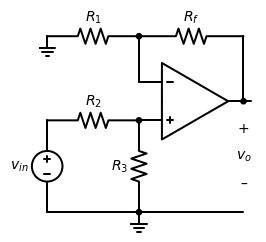

In [11]:
d = schemdraw.Drawing()
d += (op := elm.Opamp())
d += elm.Line(at=op.out).length(.75)
d += elm.Line().left().at(op.in1).length(.75)
d += elm.Line().up().length(1.5)
d += elm.Dot()
d += (R1 := elm.Resistor().left().label('$R_1$'))
d += elm.Ground()
d += (Rf := elm.Resistor().right().at(R1.start).tox(op.out+.5).label('$R_f$'))
d += elm.Line().down().toy(op.out)
d += (dot := elm.Dot())
d += elm.Line().left().at(op.in2).length(.75)
d += elm.Dot()
d += (R3 := elm.Resistor().down().label('$R_3$'))
d += elm.Dot()
d += elm.Ground()
d += (R2 := elm.Resistor().left().at(R3.start).label('$R_2$'))
d += elm.SourceV().down().reverse().label('$v_{in}$')
d += elm.Line().right().tox(Rf.end)
d += elm.Gap().down().at(dot.start).toy(R3.end).label(['+','$v_o$','–'])
d.draw()

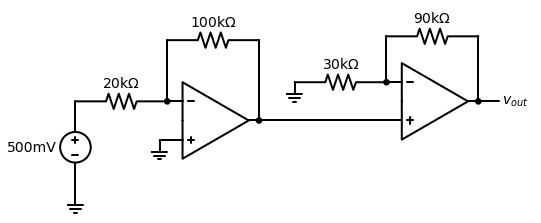

In [12]:
d = schemdraw.Drawing()
d += elm.Ground()
d += elm.SourceV().label('500mV')

d += elm.Resistor().right().label('20k$\Omega$')
d += (Vin := elm.Dot())
d += elm.Line().length(.5)
d += (O1 := elm.Opamp().anchor('in1'))
d += elm.Line().left().length(0.75).at(O1.in2)
d += elm.Ground()
d += elm.Line().up().at(Vin.start).length(2)
d += elm.Resistor().right().label('100k$\Omega$')
d += elm.Line().down().toy(O1.out)
d += elm.Dot()
d += elm.Line().right().at(O1.out).length(5)
d += (O2 := elm.Opamp().anchor('in2'))
d += (Vin2 := elm.Line().left().at(O2.in1).length(0.5))
d += elm.Dot()
d += elm.Resistor().left().label('30k$\Omega$')
d += elm.Ground()
d += elm.Line().up().at(Vin2.end).length(1.5)
d += elm.Resistor().right().label('90k$\Omega$')
d += elm.Line().down().toy(O2.out)
d += elm.Dot()
d += elm.Line().right().at(O2.out).length(1).label('$v_{out}$', loc='rgt')
d.draw()


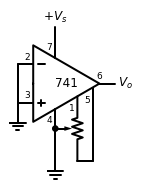

In [13]:
d = schemdraw.Drawing(fontsize=12)
op = (elm.Opamp().label('741', loc='center', ofst=0)
                 .label('1', 'n1', fontsize=9, ofst=(-.1, -.25), halign='right', valign='top')
                 .label('5', 'n1a', fontsize=9, ofst=(-.1, -.25), halign='right', valign='top')
                 .label('4', 'vs', fontsize=9, ofst=(-.1, -.2), halign='right', valign='top')
                 .label('7', 'vd', fontsize=9, ofst=(-.1, .2), halign='right', valign='bottom')
                 .label('2', 'in1', fontsize=9, ofst=(-.1, .1), halign='right', valign='bottom')
                 .label('3', 'in2', fontsize=9, ofst=(-.1, .1), halign='right', valign='bottom')
                 .label('6', 'out', fontsize=9, ofst=(-.1, .1), halign='left', valign='bottom'))
d += op
d += elm.Line().left().at(op.in1).length(0.5)
d += elm.Line().down().length(d.unit/2)
d += elm.Ground()
d += elm.Line().left().at(op.in2).length(0.5)
d += elm.Line().right().at(op.out).length(0.5).label('$V_o$', 'right')
d += elm.Line().up().at(op.vd).length(1).label('$+V_s$', 'right')
d += (trim := elm.Potentiometer().down().at(op.n1).flip().scale(0.7))
d += elm.Line().right().tox(op.n1a)
d += elm.Line().up().to(op.n1a)
d += elm.Line().left().at(trim.tap).tox(op.vs)
d += elm.Dot()
d.push()
d += elm.Line().down().length(d.unit/3)
d += elm.Ground()
d.pop()
d += elm.Line().up().toy(op.vs)
d.draw()

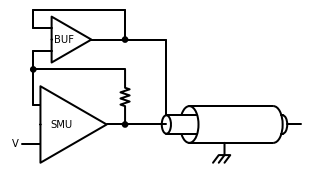

In [14]:
d = schemdraw.Drawing(fontsize=10)
d += elm.Line().length(d.unit/5).label('V', 'left')
d += (smu := elm.Opamp(sign=False).anchor('in2')
                  .label('SMU', 'center', ofst=[-.4, 0], halign='center', valign='center'))
d += elm.Line().at(smu.out).length(d.unit/5)
d.push()
d += elm.Line().length(d.unit/4)
d += (triax := elm.triax(length=5, shieldofststart=.75))
d.pop()
d += elm.Dot()
d += elm.Resistor().up().length(d.unit).scale(0.6)
d += elm.Line().left()
d += elm.Dot()
d.push()
d += elm.Line().down().toy(smu.in1)
d += elm.Line().right().tox(smu.in1)
d.pop()
d += elm.Line().up().length(d.unit/5)
d += elm.Line().right().length(d.unit/5)
d += (buf := elm.Opamp(sign=False).anchor('in2').scale(0.6)
                     .label('BUF', 'center', ofst=(-.4, 0), halign='center', valign='center'))

d += elm.Line().left().at(buf.in1).length(d.unit/5)
d += elm.Line().up().length(d.unit/5)
d += elm.Line().right()
d += elm.Line().down().toy(buf.out)
d += elm.Dot()
d.push()
d += elm.Line().left().tox(buf.out)
d.pop()
d += elm.Line().right().tox(triax.guardstart_top)
d += elm.Line().down().toy(triax.guardstart_top)
d += elm.GroundChassis().at(triax.shieldcenter)
d.draw()


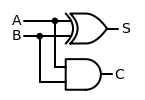

In [15]:
d = schemdraw.Drawing(unit=.5)
d += (S := logic.Xor().label('S', 'right'))
d += (A := logic.Dot().at(S.in1))
d += logic.Line().left().length(d.unit*2).label('A', 'left')
d += logic.Line().left().at(S.in2)
d += (B := logic.Dot())
d += logic.Line().left().label('B', 'left')

d += logic.Line().down().at(A.start).length(d.unit*3)
d += (C := logic.And().right().anchor('in1').label('C', 'right'))
d += logic.Line().down().at(B.start).toy(C.in2)
d += logic.Line().to(C.in2)
d.draw()


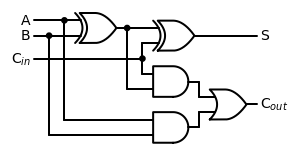

In [16]:
d = schemdraw.Drawing(unit=.5)
d += (X1 := logic.Xor())
d += logic.Dot()
d += (A := logic.Dot().at(X1.in1))
d += (Ain := logic.Line().left().length(d.unit*2).label('A', 'left'))
d += logic.Line().left().at(X1.in2)
d += (B := logic.Dot())
d += logic.Line().left().label('B', 'left')

d += logic.Line().right().at(X1.out).length(d.unit)
d += (X2 := logic.Xor().anchor('in1'))
d += (C := logic.Line().down().at(X2.in2).length(d.unit*2))
d.push()
d += logic.Dot().at(C.center)
d += logic.Line().left().tox(Ain.end).label('C$_{in}$', 'left')
d.pop()

d += (A1 := logic.And().right().anchor('in1'))
d += logic.Line().left().at(A1.in2).tox(X1.out)
d += logic.Line().up().toy(X1.out)
d += (A2 := logic.And().right().anchor('in1').at((A1.in1[0],A1.in2[1]-d.unit*2)))
d += logic.Line().left().at(A2.in1).tox(A.start)
d += logic.Line().up().toy(A.start)
d += logic.Line().left().at(A2.in2).tox(B.start)
d += logic.Line().up().toy(B.start)

d += (O1 := logic.Or().right().at((A1.out[0],(A1.out[1]+A2.out[1])/2))
                .label('C$_{out}$', 'right'))
d += logic.Line().down().at(A1.out).toy(O1.in1)
d += logic.Line().up().at(A2.out).toy(O1.in2)
d += logic.Line().right().at(X2.out).tox(O1.out).label('S', 'right')
d.draw()


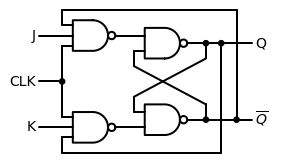

In [17]:
d = schemdraw.Drawing()
# Two front gates (SR latch)
d += (G1 := logic.Nand().anchor('in1'))
d += logic.Line().length(d.unit/6)
d += (Q1 := logic.Dot())
d += logic.Line().length(d.unit/6)
d += (Q2 := logic.Dot())
d += logic.Line().length(d.unit/3).label('Q', 'right')
d += (G2 := logic.Nand().anchor('in1').at((G1.in1[0],G1.in1[1]-2.5)))
d += logic.Line().length(d.unit/6)
d += (Qb := logic.Dot())
d += logic.Line().length(d.unit/3)
d += (Qb2 := logic.Dot())
d += logic.Line().length(d.unit/6).label('$\overline{Q}$', 'right')
d += (S1 := logic.Line().up().at(G2.in1).length(d.unit/6))
d += logic.Line().down().at(Q1.start).length(d.unit/6)
d += logic.Line().to(S1.end)
d += (R1 := logic.Line().down().at(G1.in2).length(d.unit/6))
d += logic.Line().up().at(Qb.start).length(d.unit/6)
d += logic.Line().to(R1.end)

# Two back gates
d += logic.Line().left().at(G1.in1).length(d.unit/6)
d += (J := logic.Nand(inputs=3).anchor('out').reverse())
d += logic.Line().up().at(J.in3).length(d.unit/6)
d += logic.Line().right().tox(Qb2.start)
d += logic.Line().down().toy(Qb2.start)
d += logic.Line().left().at(J.in2).length(d.unit/4).label('J', 'left')
d += logic.Line().left().at(G2.in2).length(d.unit/6)
d += (K := logic.Nand(inputs=3).reverse().anchor('out'))
d += logic.Line().down().at(K.in1).length(d.unit/6)
d += logic.Line().right().tox(Q2.start)
d += logic.Line().up().toy(Q2.start)
d += logic.Line().left().at(K.in2).length(d.unit/4).label('K', 'left')
d += (C := logic.Line().down().at(J.in1).toy(K.in3))
d += logic.Dot().at(C.center)
d += logic.Line().left().at(C.center).length(d.unit/4).label('CLK', 'left')
d.draw()


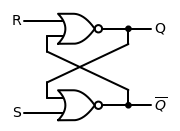

In [18]:
d = schemdraw.Drawing()
d += logic.Line().length(d.unit/4).label('R', 'left')
d += (G1 := logic.Nor().anchor('in1'))
d += logic.Line().length(d.unit/4)
d += (Q := logic.Dot())
d += logic.Line().length(d.unit/4).label('Q', 'right')

d += (G2 := logic.Nor().at((G1.in1[0],G1.in1[1]-2.5)).anchor('in1'))
d += logic.Line().length(d.unit/4)
d += (Qb := logic.Dot())
d += logic.Line().length(d.unit/4).label('$\overline{Q}$', 'right')
d += (S1 := logic.Line().up().at(G2.in1).length(d.unit/6))
d += logic.Line().down().at(Q.start).length(d.unit/6)
d += logic.Line().to(S1.end)
d += (R1 := logic.Line().down().at(G1.in2).length(d.unit/6))
d += logic.Line().up().at(Qb.start).length(d.unit/6)
d += logic.Line().to(R1.end)
d += logic.Line().left().at(G2.in2).length(d.unit/4).label('S', 'left')
d.draw()


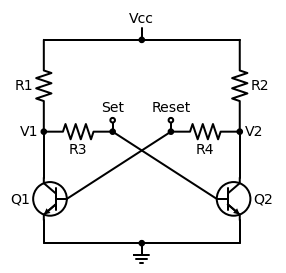

In [19]:
d = schemdraw.Drawing()
d += (Q1 := elm.BjtNpn(circle=True).reverse().label('Q1', 'left'))
d += (Q2 := elm.BjtNpn(circle=True).at((d.unit*2, 0)).label('Q2'))
d += elm.Line().up().at(Q1.collector).length(d.unit/2)

d += (R1 := elm.Resistor().up().label('R1').hold())
d += elm.Dot().label('V1', 'left')
d += elm.Resistor().right().length(d.unit*.75).label('R3', 'bottom')
d += elm.Dot()
d.push()
d += elm.Line().up().length(d.unit/8)
d += elm.Dot(open=True).label('Set')
d.pop()
d += elm.Line().to(Q2.base)

d += elm.Line().up().at(Q2.collector).length(d.unit/2)
d += elm.Dot().label('V2', 'right')
d += (R2 := elm.Resistor().up().label('R2', 'bottom').hold())
d += elm.Resistor().left().length(d.unit*.75).label('R4', 'bottom')
d += elm.Dot()
d.push()
d += elm.Line().up().length(d.unit/8)
d += elm.Dot(open=True).label('Reset')
d.pop()
d += elm.Line().to(Q1.base)

d += elm.Line().down().at(Q1.emitter).length(d.unit/4)
d += (BOT := elm.Line().right().tox(Q2.emitter))
d += elm.Line().to(Q2.emitter)
d += elm.Dot().at(BOT.center)
d += elm.Ground().at(BOT.center)

d += (TOP := elm.Line().endpoints(R1.end, R2.end))
d += elm.Dot().at(TOP.center)
d += elm.Line().up().at(TOP.center).length(d.unit/8).label('Vcc', 'right')
d.draw()

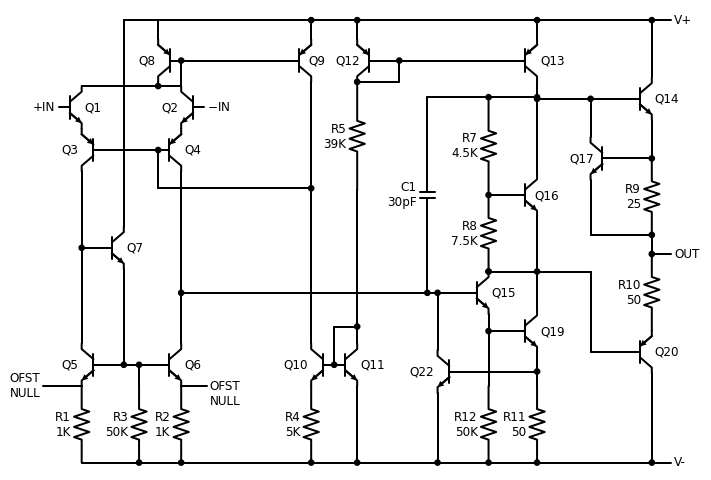

In [20]:
d = schemdraw.Drawing(fontsize=12, unit=2.5)
d += (Q1 := elm.BjtNpn().label('Q1').label('+IN', 'left'))
d += (Q3 := elm.BjtPnp().left().at(Q1.emitter).anchor('emitter').flip().label('Q3', 'left'))
d += elm.LineDot().down().at(Q3.collector)
d.push()
d += elm.Line().right().length(d.unit/4)
d += (Q7 := elm.BjtNpn().anchor('base').label('Q7'))
d.pop()
d += elm.Line().down().length(d.unit*1.25)
d += (Q5 := elm.BjtNpn().left().flip().anchor('collector').label('Q5', 'left'))
d += elm.Line().left().at(Q5.emitter).length(d.unit/2).label('OFST\nNULL', 'left').flip()
d += elm.Resistor().down().at(Q5.emitter).label('R1\n1K')
d += elm.LineDot().right().length(d.unit*.75)
d += (R3 := elm.Resistor().up().label('R3\n50K'))
d += elm.LineDot().toy(Q5.base)
d.push()
d += elm.Line().left().to(Q5.base)
d += elm.LineDot().down().at(Q7.emitter).toy(Q5.base)
d.pop()
d += elm.Line().right().length(d.unit/4)
d += (Q6 := elm.BjtNpn().anchor('base').label('Q6'))
d += elm.Line().at(Q6.emitter).length(d.unit/3).label('\nOFST\nNULL', 'right').hold()
d += elm.Resistor().down().at(Q6.emitter).label('R2\n1K')
d += elm.Dot()

d += elm.Line().up().at(Q6.collector).toy(Q3.collector)
d += (Q4 := elm.BjtPnp().right().anchor('collector').label('Q4'))
d += elm.Line().left().at(Q4.base).tox(Q3.base)
d += elm.Line().up().at(Q4.emitter).toy(Q1.emitter)
d += (Q2 := elm.BjtNpn().left().flip().anchor('emitter').label('Q2', 'left').label('$-$IN', 'right'))
d += elm.LineDot().up().at(Q2.collector).length(d.unit/3)
d += (Q8 := elm.BjtPnp().left().flip().anchor('base').label('Q8', 'left'))
d += elm.LineDot().down().at(Q8.collector).toy(Q2.collector)
d += elm.Line().left().at(Q2.collector).tox(Q1.collector)
d += elm.Line().up().at(Q8.emitter).length(d.unit/4)
d += (top := elm.Line().left().tox(Q7.collector))
d += elm.Line().down().toy(Q7.collector)

d += elm.Line().right().at(top.start).length(d.unit*2)
d += elm.Line().down().length(d.unit/4)
d += (Q9 := elm.BjtPnp().right().anchor('emitter').label('Q9', ofst=-.1))
d += elm.Line().left().at(Q9.base).tox(Q8.base)
d += elm.Dot().at(Q4.base)
d += elm.Line().down().at(Q4.base).length(d.unit/2)
d += elm.LineDot().right().tox(Q9.collector)
d += elm.Line().down().at(Q9.collector).toy(Q6.collector)
d += (Q10 := elm.BjtNpn().left().flip().anchor('collector').label('Q10', 'left'))
d += elm.Resistor().down().at(Q10.emitter).toy(R3.start).label('R4\n5K')
d += elm.Dot()

d += (Q11 := elm.BjtNpn().right().at(Q10.base).anchor('base').label('Q11'))
d += elm.Dot().at(Q11.base)
d += elm.Line().up().length(d.unit/2)
d += elm.LineDot().right().tox(Q11.collector)
d += elm.LineDot().down().at(Q11.emitter).toy(R3.start)
d += elm.Line().up().at(Q11.collector).length(d.unit*2)
d += elm.Resistor().toy(Q9.collector).label('R5\n39K')
d += (Q12 := elm.BjtPnp().left().flip().anchor('collector').label('Q12', 'left', ofst=-.1))
d += elm.LineDot().up().at(Q12.emitter).length(d.unit/4)
d += elm.LineDot().left().tox(Q9.emitter)
d += elm.LineDot().right().at(Q12.base).length(d.unit/4)
d.push()
d += elm.Line().down().toy(Q12.collector)
d += elm.LineDot().left().tox(Q12.collector)
d.pop()
d += elm.Line().right().length(d.unit*1.5)
d += (Q13 := elm.BjtPnp().anchor('base').label('Q13'))
d += elm.LineDot().up().length(d.unit/4)
d += elm.Line().left().tox(Q12.emitter)
d += (K := elm.Line().down().at(Q13.collector).length(d.unit/5))
d += elm.Dot()
d += elm.Line().down()
d += (Q16 := elm.BjtNpn().right().anchor('collector').label('Q16', ofst=-.1))
d += elm.LineDot().left().at(Q16.base).length(d.unit/3)
d += (R7 := elm.Resistor().up().toy(K.end).label('R7\n4.5K'))
d += elm.Dot()
d += elm.Line().right().tox(Q13.collector).hold()
d += (R8 := elm.Resistor().down().at(R7.start).label('R8\n7.5K'))
d += elm.Dot()
d += elm.Line().right().tox(Q16.emitter)
d += (J := elm.Dot())
d += elm.Line().up().toy(Q16.emitter)
d += (Q15 := elm.BjtNpn().right().at(R8.end).anchor('collector').label('Q15'))
d += elm.LineDot().left().at(Q15.base).length(d.unit/2)
d += (C1 := elm.Capacitor().up().toy(R7.end).label('C1\n30pF'))
d += elm.Line().right().tox(Q13.collector)
d += elm.LineDot().left().at(C1.start).tox(Q6.collector)
d += elm.Line().down().at(J.center).length(d.unit/2)
d += (Q19 := elm.BjtNpn().right().anchor('collector').label('Q19'))
d += elm.LineDot().left().at(Q19.base).tox(Q15.emitter)
d += elm.Line().up().toy(Q15.emitter).hold()
d += elm.LineDot().down().at(Q19.emitter).length(d.unit/4)
d += elm.Line().left()
d += (Q22 := elm.BjtNpn().left().anchor('base').flip().label('Q22', 'left'))
d += elm.LineDot().up().at(Q22.collector).toy(Q15.base)
d += elm.LineDot().down().at(Q22.emitter).toy(R3.start)
d += elm.Line().left().tox(R3.start).hold()
d += elm.LineDot().right().tox(Q15.emitter)
d.push()
d += elm.Resistor().up().label('R12\n50K')
d += elm.Line().toy(Q19.base)
d.pop()
d += elm.LineDot().tox(Q19.emitter)
d += (R11 := elm.Resistor().up().label('R11\n50'))
d += elm.Line().toy(Q19.emitter)

d += elm.Line().up().at(Q13.emitter).length(d.unit/4)
d += elm.LineDot().right().length(d.unit*1.5)
d += elm.Line().length(d.unit/4).label('V+', 'right').hold()
d += elm.Line().down().length(d.unit*.75)
d += (Q14 := elm.BjtNpn().right().anchor('collector').label('Q14'))
d += elm.Line().left().at(Q14.base).length(d.unit/2)
d.push()
d += elm.Dot()
d += elm.Line().down().length(d.unit/2)
d += (Q17 := elm.BjtNpn().left().anchor('collector').flip().label('Q17', 'left', ofst=-.1))
d += elm.LineDot().right().at(Q17.base).tox(Q14.emitter)
d += (J := elm.Line().up().toy(Q14.emitter))
d.pop()
d += elm.LineDot().tox(Q13.collector)
d += elm.Resistor().down().at(J.start).label('R9\n25')
d += elm.Dot()
d.push()
d += elm.Line().left().tox(Q17.emitter)
d += elm.Line().up().toy(Q17.emitter)
d.pop()
d += elm.LineDot().down().length(d.unit/4)
d += elm.Line().right().length(d.unit/4).label('OUT', 'right').hold()
d += elm.Resistor().down().label('R10\n50')
d += (Q20 := elm.BjtPnp().right().anchor('emitter').label('Q20'))
d += elm.Line().left().at(Q20.base).length(d.unit/2)
d += elm.Line().up().toy(Q15.collector)
d += elm.LineDot().left().tox(Q15.collector)
d += elm.LineDot().down().at(Q20.collector).toy(R3.start)
d += elm.Line().right().length(d.unit/4).label('V-', 'right').hold()
d += elm.Line().left().tox(R11.start)
d.draw()


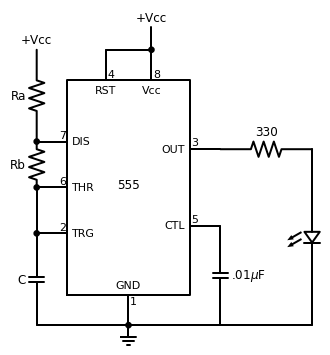

In [21]:
d = schemdraw.Drawing(fontsize=12)
IC555def = elm.Ic(pins=[elm.IcPin(name='TRG', side='left', pin='2'),
                        elm.IcPin(name='THR', side='left', pin='6'),
                        elm.IcPin(name='DIS', side='left', pin='7'),
                        elm.IcPin(name='CTL', side='right', pin='5'),
                        elm.IcPin(name='OUT', side='right', pin='3'),
                        elm.IcPin(name='RST', side='top', pin='4'),
                        elm.IcPin(name='Vcc', side='top', pin='8'),
                        elm.IcPin(name='GND', side='bot', pin='1'),],
                   edgepadW=.5,
                   edgepadH=1,
                   pinspacing=1.5,
                   leadlen=1,
                   label='555')
d += (T := IC555def)
d += (BOT := elm.Ground(xy=T.GND))
d += elm.Dot()
d += elm.Resistor().endpoints(T.DIS, T.THR).label('Rb')
d += elm.Resistor().up().at(T.DIS).label('Ra').label('+Vcc', 'right')
d += elm.Line().endpoints(T.THR, T.TRG)
d += elm.Capacitor().down().at(T.TRG).toy(BOT.start).label('C')
d += elm.Line().right().tox(BOT.start)
d += elm.Capacitor().down().at(T.CTL).toy(BOT.start).label('.01$\mu$F', 'bottom')
d += elm.Dot().at(T.DIS)
d += elm.Dot().at(T.THR)
d += elm.Dot().at(T.TRG)
d += elm.Line().endpoints(T.RST,T.Vcc)
d += elm.Dot()
d += elm.Line().up().length(d.unit/4).label('+Vcc', 'right')
d += elm.Resistor().right().at(T.OUT).label('330')
d += elm.LED().down().flip().toy(BOT.start)
d += elm.Line().left().tox(BOT.start)
d.draw()


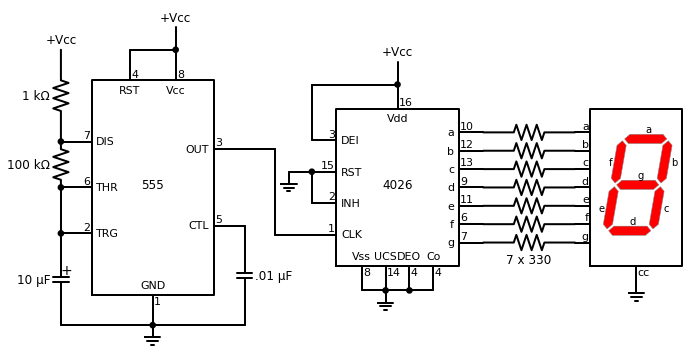

In [22]:
d = schemdraw.Drawing(fontsize=12)
d += (IC555 := elm.Ic555())
d += (gnd := elm.Ground(xy=IC555.GND))
d += elm.Dot()
d += elm.Resistor().endpoints(IC555.DIS, IC555.THR).label('100 kΩ')
d += elm.Resistor().up().at(IC555.DIS).label('1 kΩ').label('+Vcc', 'right')
d += elm.Line().endpoints(IC555.THR, IC555.TRG)
d += elm.Capacitor(polar=True).down().at(IC555.TRG).toy(gnd.start).label('10 μF')
d += elm.Line().right().tox(gnd.start)
d += elm.Capacitor().down().at(IC555.CTL).toy(gnd.start).label('.01 μF', 'bottom')
d += elm.Line().left().tox(gnd.start)

d += elm.Dot().at(IC555.DIS)
d += elm.Dot().at(IC555.THR)
d += elm.Dot().at(IC555.TRG)
d += elm.Line().endpoints(IC555.RST,IC555.Vcc)
d += elm.Dot()
d += elm.Line().up().length(d.unit/4).label('+Vcc', 'right')

IC4026 = elm.Ic(pins=[elm.IcPin('CLK', pin='1', side='left'),
                      elm.IcPin('INH', pin='2', side='left'), # Inhibit
                      elm.IcPin('RST', pin='15', side='left'),
                      elm.IcPin('DEI', pin='3', side='left'), # Display Enable In
                      elm.IcPin('Vss', pin='8', side='bot'),
                      elm.IcPin('Vdd', pin='16', side='top'),
                      elm.IcPin('UCS', pin='14', side='bot'), # Ungated C Segment
                      elm.IcPin('DEO', pin='4', side='bot'),  # Display Enable Out
                      elm.IcPin('Co', pin='4', side='bot'),   # Carry out
                      elm.IcPin('g', pin='7', side='right'),
                      elm.IcPin('f', pin='6', side='right'),                      
                      elm.IcPin('e', pin='11', side='right'),
                      elm.IcPin('d', pin='9', side='right'),
                      elm.IcPin('c', pin='13', side='right'),
                      elm.IcPin('b', pin='12', side='right'),
                      elm.IcPin('a', pin='10', side='right'),
                     ],
               w=4, leadlen=.8).label('4026').right()

d += IC4026.at((IC555.OUT[0]+5, IC555.center[1])).anchor('center')
d += elm.Line().at(IC555.OUT).right().length(d.unit/3)
d += elm.Line().down().toy(IC4026.CLK)
d += elm.Line().right().tox(IC4026.CLK)
d += elm.LineDot().endpoints(IC4026.INH, IC4026.RST)
d += elm.Line().left().length(d.unit/4)
d += elm.Ground()
d += elm.Line().at(IC4026.DEI).up().toy(IC4026.Vdd)
d += elm.LineDot().right().tox(IC4026.Vdd)
d += elm.Line().up().length(d.unit/4).label('+Vcc', 'right')
d += elm.LineDot().right().at(IC4026.Vss).tox(IC4026.UCS)
d += elm.Ground()
d += elm.LineDot().tox(IC4026.DEO)
d += elm.Line().tox(IC4026.Co)

d += elm.Resistor().right().at(IC4026.a)
d += (disp := elm.SevenSegment(cathode=True).anchor('a'))
d += elm.Resistor().at(IC4026.b)
d += elm.Resistor().at(IC4026.c)
d += elm.Resistor().at(IC4026.d)
d += elm.Resistor().at(IC4026.e)
d += elm.Resistor().at(IC4026.f)
d += elm.Resistor().at(IC4026.g).label('7 x 330', loc='bottom')
d += elm.Ground().at(disp.cathode)
d.draw()

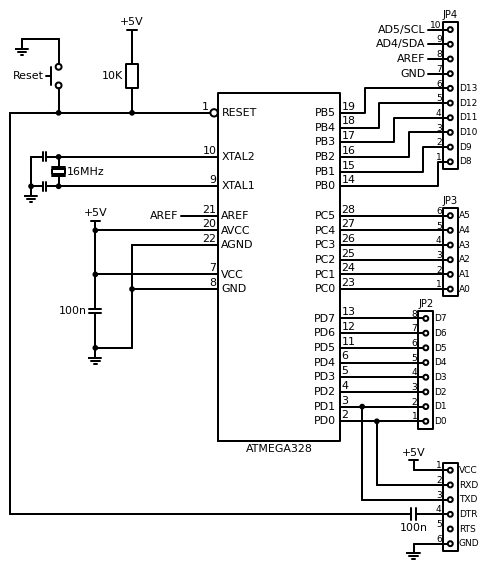

In [23]:
class Atmega328(elm.Ic):
    def __init__(self, *args, **kwargs):
        pins=[elm.IcPin(name='PD0', pin='2', side='r', slot='1/22'),
              elm.IcPin(name='PD1', pin='3', side='r', slot='2/22'),
              elm.IcPin(name='PD2', pin='4', side='r', slot='3/22'),
              elm.IcPin(name='PD3', pin='5', side='r', slot='4/22'),
              elm.IcPin(name='PD4', pin='6', side='r', slot='5/22'),
              elm.IcPin(name='PD5', pin='11', side='r', slot='6/22'),             
              elm.IcPin(name='PD6', pin='12', side='r', slot='7/22'),             
              elm.IcPin(name='PD7', pin='13', side='r', slot='8/22'),
              elm.IcPin(name='PC0', pin='23', side='r', slot='10/22'),
              elm.IcPin(name='PC1', pin='24', side='r', slot='11/22'),
              elm.IcPin(name='PC2', pin='25', side='r', slot='12/22'),
              elm.IcPin(name='PC3', pin='26', side='r', slot='13/22'),
              elm.IcPin(name='PC4', pin='27', side='r', slot='14/22'),
              elm.IcPin(name='PC5', pin='28', side='r', slot='15/22'),
              elm.IcPin(name='PB0', pin='14', side='r', slot='17/22'),
              elm.IcPin(name='PB1', pin='15', side='r', slot='18/22'),
              elm.IcPin(name='PB2', pin='16', side='r', slot='19/22'),
              elm.IcPin(name='PB3', pin='17', side='r', slot='20/22'),
              elm.IcPin(name='PB4', pin='18', side='r', slot='21/22'),
              elm.IcPin(name='PB5', pin='19', side='r', slot='22/22'),
    
              elm.IcPin(name='RESET', side='l', slot='22/22', invert=True, pin='1'),
              elm.IcPin(name='XTAL2', side='l', slot='19/22', pin='10'),
              elm.IcPin(name='XTAL1', side='l', slot='17/22', pin='9'),
              elm.IcPin(name='AREF', side='l', slot='15/22', pin='21'),
              elm.IcPin(name='AVCC', side='l', slot='14/22', pin='20'),
              elm.IcPin(name='AGND', side='l', slot='13/22', pin='22'),
              elm.IcPin(name='VCC', side='l', slot='11/22', pin='7'),
              elm.IcPin(name='GND', side='l', slot='10/22', pin='8')]
        super().__init__(pins=pins, w=5, plblofst=.05, botlabel='ATMEGA328', **kwargs)


d = schemdraw.Drawing(fontsize=11, inches_per_unit=.4)
d += (Q1 := Atmega328())
d += (JP4 := elm.Header(rows=10, shownumber=True, pinsright=['D8', 'D9', 'D10', 'D11', 'D12', 'D13', '', '', '', ''], pinalignright='center')
                        .flip().at((Q1.PB5[0]+4, Q1.PB5[1]+1)).anchor('pin6').label('JP4', fontsize=10))

d += (JP3 := elm.Header(rows=6, shownumber=True, pinsright=['A0', 'A1', 'A2', 'A3', 'A4', 'A5'], pinalignright='center')
                    .flip().at((Q1.PC5[0]+4, Q1.PC5[1])).anchor('pin6').label('JP3', fontsize=10))

d += (JP2 := elm.Header(rows=8, shownumber=True, pinsright=['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7'],
                        pinalignright='center')).flip().at((Q1.PD7[0]+3, Q1.PD7[1])).anchor('pin8').label('JP2', fontsize=10)

d += elm.OrthoLines(n=6).at(Q1.PB5).to(JP4.pin6)
d += elm.OrthoLines(n=6).at(Q1.PC5).to(JP3.pin6)
d += elm.OrthoLines(n=8).at(Q1.PD7).to(JP2.pin8)

d += elm.Line().left().at(JP4.pin7).length(.9).label('GND', 'left')
d += elm.Line().left().at(JP4.pin8).length(.9).label('AREF', 'left')
d += elm.Line().left().at(JP4.pin9).length(.9).label('AD4/SDA', 'left')
d += elm.Line().left().at(JP4.pin10).length(.9).label('AD5/SCL', 'left')

d += (JP1 := elm.Header(rows=6, shownumber=True, pinsright=['VCC', 'RXD', 'TXD', 'DTR', 'RTS', 'GND'],
                        pinalignright='center').right().at((Q1.PD0[0]+4, Q1.PD0[1]-2)).anchor('pin1'))
d += elm.Line().left().at(JP1.pin1).length(d.unit/2)
d += elm.Vdd().label('+5V')
d += elm.Line().left().at(JP1.pin2).length(d.unit)
d += elm.Line().up().toy(Q1.PD0)
d += elm.Dot()
d += elm.Line().left().at(JP1.pin3).length(d.unit+0.6)
d += elm.Line().up().toy(Q1.PD1)
d += elm.Dot()
d += elm.Line().left().at(JP1.pin6).length(d.unit/2)
d += elm.Ground()

d += elm.Line().left().at(Q1.XTAL2).length(d.unit*2)
d += elm.Dot()
d.push()
d += elm.Capacitor().left().scale(.75).length(d.unit/2)
d += elm.Line().down().toy(Q1.XTAL1)
d += elm.Dot()
d += elm.Ground()
d += elm.Capacitor().right().scale(.75).length(d.unit/2)
d += elm.Dot()
d.pop()
d += elm.Crystal().down().toy(Q1.XTAL1).label('16MHz', 'bottom')
d += elm.Line().right().tox(Q1.XTAL1)

d += elm.Line().left().at(Q1.AREF).length(d.unit/3).label('AREF', 'left')
d += elm.Line().left().at(Q1.AVCC).length(1.5*d.unit)
d += elm.Vdd().label('+5V')
d += elm.Dot()
d += elm.Line().down().toy(Q1.VCC)
d += elm.Dot()
d += elm.Line().right().tox(Q1.VCC).hold()
d += elm.Capacitor().down().label('100n')
d += (GND := elm.Ground())

d += elm.Line().left().at(Q1.AGND)
d += elm.Line().down().toy(Q1.GND)
d += elm.Dot()
d += elm.Line().right().tox(Q1.GND).hold()
d += elm.Line().down().toy(GND.xy)
d += elm.Line().left().tox(GND.xy)
d += elm.Dot()

d += elm.Line().left().at(Q1.RESET)
d += elm.Dot()
d.push()
d += elm.RBox().up().label('10K')
d += elm.Vdd().label('+5V')
d.pop()
d += elm.Line().left()
d.push()
d += elm.Dot()
d += (RST := elm.Button().up().label('Reset'))
d += elm.Line().left().length(d.unit/2)
d += elm.Ground()
d.pop()

d += elm.Capacitor().left().at(JP1.pin4).label('100n', 'bottom')
d += elm.Line().left().tox(RST.start[0]-2)
d += elm.Line().up().toy(Q1.RESET)
d += elm.Line().right().tox(RST.start)

d.draw()

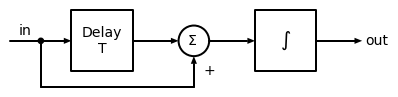

In [24]:
d = schemdraw.Drawing()
d += dsp.Line().length(d.unit/3).label('in')
d += (inpt := dsp.Dot())
d += dsp.Arrow().length(d.unit/3)
d += (delay := dsp.Box(w=2, h=2).anchor('W').label('Delay\nT'))
d += dsp.Arrow().right().length(d.unit/2).at(delay.E)
d += (sm := dsp.SumSigma())
d += dsp.Arrow().at(sm.E).length(d.unit/2)
d += (intg := dsp.Box(w=2, h=2).anchor('W').label('$\int$'))
d += dsp.Arrow().right().at(intg.E).length(d.unit/2).label('out', loc='right')
d += dsp.Line().down().at(inpt.center).length(d.unit/2)
d += dsp.Line().right().tox(sm.S)
d += dsp.Arrow().up().toy(sm.S).label('+', loc='bot')
d.draw()


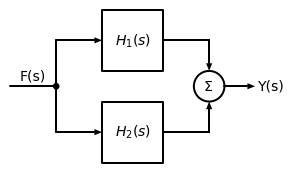

In [25]:
d = schemdraw.Drawing(fontsize=14)
d += dsp.Line().length(d.unit/2).label('F(s)')
d.push()
d += dsp.Dot()
d += dsp.Line().up().length(d.unit/2)
d += dsp.Arrow().right().length(d.unit/2)
d += (h1 := dsp.Box(w=2, h=2).anchor('W').label('$H_1(s)$'))
d.pop()
d += dsp.Line().down().length(d.unit/2)
d += dsp.Arrow().right().length(d.unit/2)
d += (h2 := dsp.Box(w=2, h=2).anchor('W').label('$H_2(s)$'))
d += (sm := dsp.SumSigma().right().at((h1.E[0] + d.unit/2, 0)).anchor('center'))
d += dsp.Line().right().at(h1.E).tox(sm.N)
d += dsp.Arrow().down().toy(sm.N)
d += dsp.Line().right().at(h2.E).tox(sm.S)
d += dsp.Arrow().up().toy(sm.S)
d += dsp.Arrow().right().at(sm.E).length(d.unit/3).label('Y(s)', 'right')
d.draw()

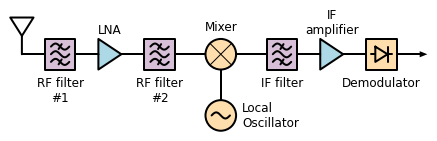

In [26]:
d = schemdraw.Drawing(fontsize=12)
d += dsp.Antenna()
d += dsp.Line().right().length(d.unit/4)
d += (filt1 := dsp.Filter(response='bp').fill('thistle').anchor('W').label('RF filter\n#1', 'bottom', ofst=.2))
d += dsp.Line().at(filt1.E).length(d.unit/4)
d += dsp.Amp().fill('lightblue').label('LNA')
d += dsp.Line().length(d.unit/4)
d += (filt2 := dsp.Filter(response='bp').anchor('W').fill('thistle').label('RF filter\n#2', 'bottom', ofst=.2))
d += dsp.Line().right().at(filt2.E).length(d.unit/3)
d += (mix := dsp.Mixer().fill('navajowhite').label('Mixer'))
d += dsp.Line().down().at(mix.S).length(d.unit/3)
d += dsp.Oscillator().right().anchor('N').fill('navajowhite').label('Local\nOscillator', 'right', ofst=.2)
d += dsp.Line().right().at(mix.E).length(d.unit/3)
d += (filtIF := dsp.Filter(response='bp').anchor('W').fill('thistle').label('IF filter', 'bottom', ofst=.2))
d += dsp.Line().right().at(filtIF.E).length(d.unit/4)
d += dsp.Amp().fill('lightblue').label('IF\namplifier')
d += dsp.Line().length(d.unit/4)
d += (demod := dsp.Demod().anchor('W').fill('navajowhite').label('Demodulator', 'bottom', ofst=.2))
d += dsp.Arrow().right().at(demod.E).length(d.unit/3)
d.draw()

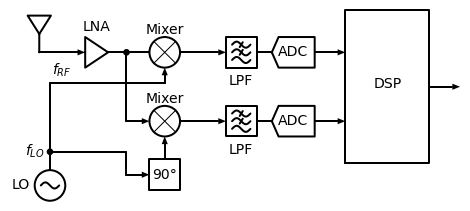

In [27]:
d = schemdraw.Drawing()
d += dsp.Antenna()
d += dsp.Arrow().right().length(d.unit/2).label('$f_{RF}$', 'bot')
d += dsp.Amp().label('LNA')
d += dsp.Line().right().length(d.unit/5)
d += dsp.Dot()
d.push()
d += dsp.Line().length(d.unit/4)
d += (mix1 := dsp.Mixer().label('Mixer', ofst=0))
d += dsp.Arrow().length(d.unit/2)
d += (lpf1 := dsp.Filter(response='lp').label('LPF', 'bot', ofst=.2))
d += dsp.Line().length(d.unit/6)
d += (adc1 := dsp.Adc().label('ADC'))
d += dsp.Arrow().length(d.unit/3)
d += (dsp1 := dsp.Ic(pins=[dsp.IcPin(side='L'), dsp.IcPin(side='L'), dsp.IcPin(side='R')],
                    size=(2.75, 5), leadlen=0).anchor('inL2').label('DSP'))
d += dsp.Arrow().at(dsp1.inR1).length(d.unit/3)
d.pop()

d += dsp.Line().down().toy(dsp1.inL1)
d += dsp.Arrow().right().tox(mix1.W)
d += (mix2 := dsp.Mixer().label('Mixer', ofst=0))
d += dsp.Arrow().tox(lpf1.W)
d += dsp.Filter(response='lp').label('LPF', 'bot', ofst=.2)
d += dsp.Line().tox(adc1.W)
d += dsp.Adc().label('ADC')
d += dsp.Arrow().to(dsp1.inL1)

d += dsp.Arrow().down().reverse().at(mix1.S).length(d.unit/6)
d += dsp.Line().left().length(d.unit*1.25)
d += dsp.Line().down().length(d.unit*.75)
d += (flo := dsp.Dot().label('$f_{LO}$', 'left'))
d.push()
d += dsp.Line().down().length(d.unit/5)
d += dsp.Oscillator().right().anchor('N').label('LO', 'left', ofst=.15)
d.pop()
d += dsp.Arrow().down().reverse().at(mix2.S).length(d.unit/4)
d += (b1 := dsp.Square().right().label('90°').anchor('N'))
d += dsp.Arrow().left().reverse().at(b1.W).length(d.unit/4)
d += dsp.Line().up().toy(flo.center)
d += dsp.Line().left().tox(flo.center)
d.draw()


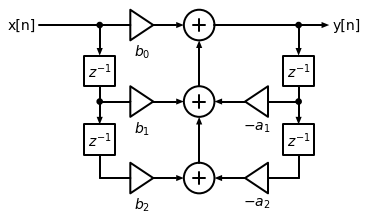

In [28]:
d = schemdraw.Drawing(unit=1, fontsize=14)
d += dsp.LineDot().length(d.unit*2).label('x[n]', 'left')

d.push()
d += dsp.Line().right()
d += dsp.Amp().label('$b_0$', 'bottom')
d += dsp.Arrow()
d += (s0 := dsp.Sum().anchor('W'))
d.pop()

d += dsp.Arrow().down()
d += (z1 := dsp.Square(label='$z^{-1}$'))
d += dsp.LineDot().length(d.unit/2)

d.push()
d += dsp.Line().right()
d += dsp.Amp().label('$b_1$', 'bottom')
d += dsp.Arrow()
d += (s1 := dsp.Sum().anchor('W'))
d.pop()

d += dsp.Arrow().down().length(d.unit*.75)
d += dsp.Square().label('$z^{-1}$')
d += dsp.Line().length(d.unit*.75)
d += dsp.Line().right()
d += dsp.Amp().label('$b_2$', 'bottom')
d += dsp.Arrow()
d += (s2 := dsp.Sum().anchor('W'))

d += dsp.Arrow().up().at(s2.N).toy(s1.S)
d += dsp.Arrow().up().at(s1.N).toy(s0.S)

d += dsp.LineDot().right().at(s0.E).length(d.unit*2.75)
d.push()
d += dsp.Arrow().right().label('y[n]', 'right')
d.pop()
d += dsp.Arrow().down()
d += dsp.Square().label('$z^{-1}$')
d += dsp.LineDot().length(d.unit/2)
d.push()
d += dsp.Line().left()
d += (a1 := dsp.Amp().label('$-a_1$', 'bottom'))
d += dsp.Arrow().at(a1.out).tox(s1.E)
d.pop()

d += dsp.Arrow().down().length(d.unit*.75)
d += dsp.Square().label('$z^{-1}$')
d += dsp.Line().length(d.unit*.75)
d += dsp.Line().left()
d += (a2 := dsp.Amp().label('$-a_2$', 'bottom'))
d += dsp.Arrow().at(a2.out).tox(s2.E)
d.draw()

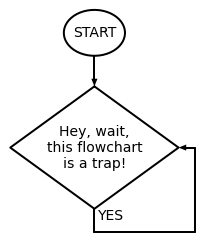

In [29]:
d = schemdraw.Drawing()
d += flow.Start(w=2, h=1.5).label('START')
d += flow.Arrow().down().length(d.unit/3)
d += (h := flow.Decision(w=5.5, h=4, S='YES').label('Hey, wait,\nthis flowchart\nis a trap!'))
d += flow.Line().down().length(d.unit/4)
d += flow.Line().right().length(d.unit*1.1)
d += flow.Line().up().toy(h.E)
d += flow.Arrow().left().tox(h.E)
d.draw()

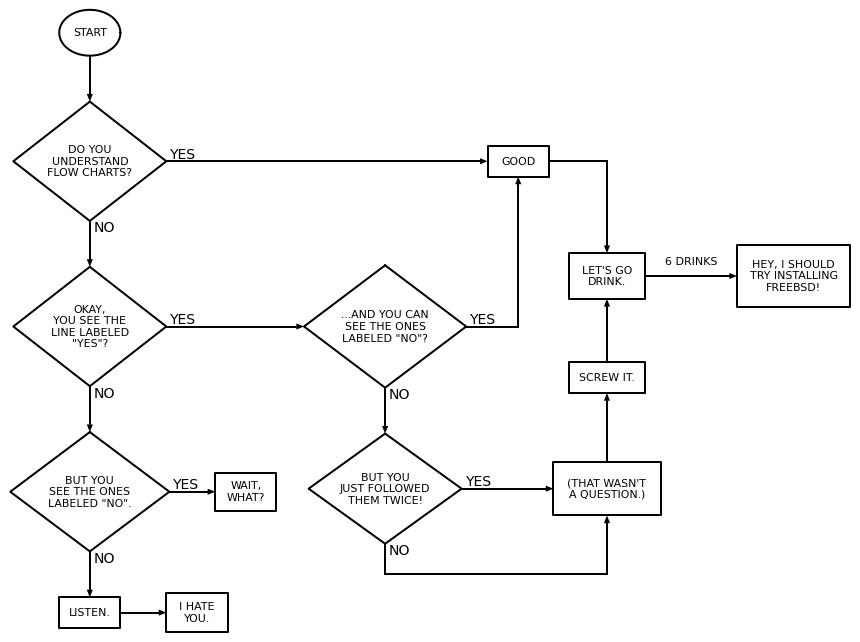

In [30]:
d = schemdraw.Drawing(fontsize=11)
d += (b := flow.Start(w=2, h=1.5).label('START'))
d += flow.Arrow().down().length(d.unit/2)
d += (d1 := flow.Decision(w=5, h=3.9, E='YES', S='NO').label('DO YOU\nUNDERSTAND\nFLOW CHARTS?'))
d += flow.Arrow().length(d.unit/2)
d += (d2 := flow.Decision(w=5, h=3.9, E='YES', S='NO').label('OKAY,\nYOU SEE THE\nLINE LABELED\n"YES"?'))
d += flow.Arrow().length(d.unit/2)
d += (d3 := flow.Decision(w=5.2, h=3.9, E='YES', S='NO').label('BUT YOU\nSEE THE ONES\nLABELED "NO".'))

d += flow.Arrow().right().at(d3.E).length(d.unit/2)
d += flow.Box(w=2, h=1.25).anchor('W').label('WAIT,\nWHAT?')
d += flow.Arrow().down().at(d3.S).length(d.unit/2)
d += (listen := flow.Box(w=2, h=1).label('LISTEN.'))
d += flow.Arrow().right().at(listen.E).length(d.unit/2)
d += (hate := flow.Box(w=2, h=1.25).anchor('W').label('I HATE\nYOU.'))

d += flow.Arrow().right().at(d1.E).length(d.unit*3.5)
d += (good := flow.Box(w=2, h=1).anchor('W').label('GOOD'))
d += flow.Arrow().right().at(d2.E).length(d.unit*1.5)
d += (d4 := flow.Decision(w=5.3, h=4.0, E='YES', S='NO').anchor('W').label('...AND YOU CAN\nSEE THE ONES\nLABELED "NO"?'))

d += flow.Line().right().at(d4.E).tox(good.S)
d += flow.Arrow().up().toy(good.S)
d += flow.Arrow().down().at(d4.S).length(d.unit/2)
d += (d5 := flow.Decision(w=5, h=3.6, E='YES', S='NO').label('BUT YOU\nJUST FOLLOWED\nTHEM TWICE!'))
d += flow.Arrow().right().at(d5.E).length(d.unit)
d += (question := flow.Box(w=3.5, h=1.75).anchor('W').label("(THAT WASN'T\nA QUESTION.)"))
d += flow.Line().down().at(d5.S).length(d.unit/3)
d += flow.Line().right().tox(question.S)
d += flow.Arrow().up().toy(question.S)

d += flow.Line().right().at(good.E).tox(question.S)
d += flow.Arrow().down().length(d.unit)
d += (drink := flow.Box(w=2.5, h=1.5).label("LET'S GO\nDRINK."))
d += flow.Arrow().right().at(drink.E).label('6 DRINKS')
d += flow.Box(w=3.7, h=2).anchor('W').label('HEY, I SHOULD\nTRY INSTALLING\nFREEBSD!')
d += flow.Arrow().up().at(question.N).length(d.unit*.75)
d += (screw := flow.Box(w=2.5, h=1).anchor('S').label('SCREW IT.'))
d += flow.Arrow().up().at(screw.N).toy(drink.S)
d.draw()


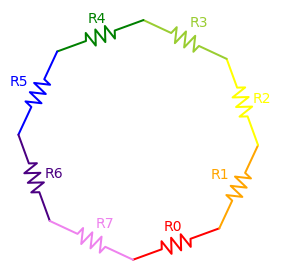

In [31]:
d = schemdraw.Drawing()
for i, color in enumerate(['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']):
    d += elm.Resistor().theta(45*i+20).color(color).label('R{}'.format(i))
d.draw()

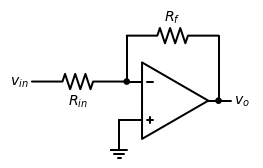

In [32]:
#import matplotlib.pyplot as plt
#plt.xkcd()

d = schemdraw.Drawing(inches_per_unit=.5)
d += (op := elm.Opamp())
d += elm.Line().left().at(op.in2).length(d.unit/4)
d += elm.Line().down().length(d.unit/5)
d += elm.Ground()
d += elm.Line().left().at(op.in1).length(d.unit/6)
d += elm.Dot()
d.push()
d += (Rin := elm.Resistor().left().at(Point(op.in1)-Point((d.unit/5,0)))
      .label('$R_{in}$', 'bottom')
      .label('$v_{in}$', 'left'))
d.pop()
d += elm.Line().up().length(d.unit/2)
d += (Rf := elm.Resistor().right().length(d.unit).label('$R_f$'))
d += elm.Line().down().toy(op.out)
d += elm.Dot()
d += elm.Line().left().tox(op.out)
d += elm.Line().right().length(d.unit/4).label('$v_{o}$', 'right')
d.draw()
